# Titanic Cleaning and Data Analysis


### Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load in dataset
The CSV I will be focusing on is located at `./data/train.csv`. The set at `test.csv` will be excluded as there is no `Survived` column.

In [2]:
# load in training set
titanic_df = pd.read_csv("./data/train.csv")

# display first five rows
display(titanic_df.head())

# create a clean copy of the dataframe for manipulating the columns without impacting the raw data
clean_df = titanic_df.copy()

# get info and describe each data column
print("\nDF info...")
print(clean_df.info())
print("\nDF description...\n", clean_df.describe())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



DF info...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

DF description...
        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008 

### Missing Values
The following columns have missing data that needs to be accounted for: `Age`, `Cabin`, and `Embarked`
- `Age`: To fill the missing `Age` data, a `Title` column will be creating using the title in each passenger's `Name`. The `Name` column will then be dropped. The `Age` will be determined as the median age amongst the `Title` of the passenger.

In [3]:
# extract the title from the name column
# the expression aims to grab the first comma after the last name then the title until the period
clean_df['Title'] = clean_df['Name'].str.extract(r',\s*([^\.]*)\s*\.', expand=False)

# simplify the less common titles
clean_df['Title'] = clean_df['Title'].replace(['Mlle', 'Ms'], 'Miss')
clean_df['Title'] = clean_df['Title'].replace(['Mme'], 'Mrs')
clean_df['Title'] = clean_df['Title'].replace(['Lady', 'the Countess','Capt', 'Col','Don', 
                                   'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')

# drop the Name column
clean_df.drop(columns=['Name'], inplace=True)

In [4]:
# fill in the age based on median age per title
clean_df['Age'] = clean_df.groupby('Title')['Age'].transform(lambda x: x.fillna(x.median()))

- `Cabin`: Most of the column is NaN. Create a `Deck` column which will contain the first letter of the cabin or Unknown if Nan. Create a binary column `HasCabinInfo`. Drop `Cabin` column.

In [5]:
# create new columns for Deck and Has_Cabin_Info
clean_df['Deck'] = clean_df['Cabin'].str[0].fillna('Unknown')
clean_df['HasCabinInfo'] = clean_df['Cabin'].notnull().astype(int)

# drop Cabin column
clean_df.drop(columns=['Cabin'], inplace=True)

- `Embarked`: Only two values are missing in this column. Since this is a basic analysis project, fill the missing values with the most common value.

In [6]:
# fill the missing values using the mode feature
clean_df['Embarked'] = clean_df['Embarked'].fillna(clean_df['Embarked'].mode()[0])

### Modifying the dataset
- The `Sex` column will change to 0 for `female` and 1 for `male`.
- While the `Ticket` cabin could be useful for finding group statistics and using ticket prefixes for modeling, the column will be dropped as it is a bit messy and inconsistent for basic analysis.

In [7]:
# change the Sex column into 0 (female) and 1 (male)
clean_df['Sex'] = np.where(clean_df['Sex'] == 'female', 0, 1)

# drop Ticket column
clean_df.drop(columns=['Ticket'], inplace=True)

# display the top 5 rows
display(clean_df.head())

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Deck,HasCabinInfo
0,1,0,3,1,22.0,1,0,7.2500,S,Mr,Unknown,0
1,2,1,1,0,38.0,1,0,71.2833,C,Mrs,C,1
2,3,1,3,0,26.0,0,0,7.9250,S,Miss,Unknown,0
3,4,1,1,0,35.0,1,0,53.1000,S,Mrs,C,1
4,5,0,3,1,35.0,0,0,8.0500,S,Mr,Unknown,0


### Exploratory Analysis

- Analyze survival rate by sex, class, age, family size, etc.
- Create bar plots, heatmaps

<Axes: xlabel='Sex', ylabel='Survived'>

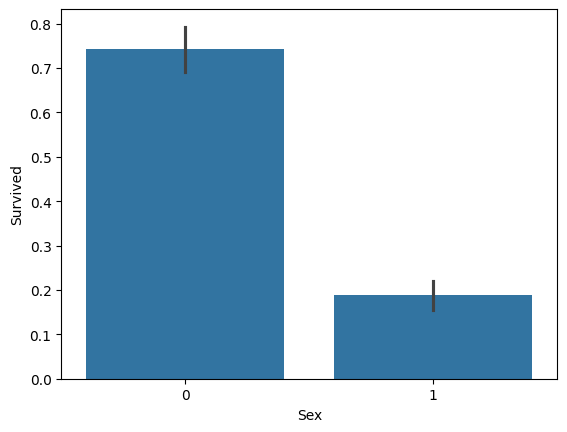

In [8]:
# survival by Sex
sns.barplot(x='Sex', y='Survived', data=clean_df)

<Axes: xlabel='Pclass', ylabel='Survived'>

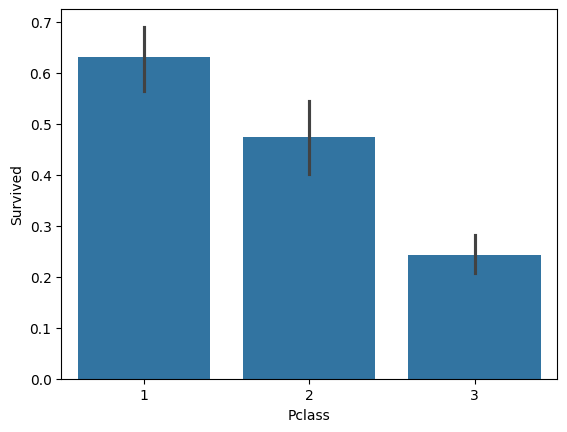

In [9]:
# survival by Pclass
sns.barplot(x='Pclass', y='Survived', data=clean_df)

<Axes: xlabel='Survived', ylabel='Age'>

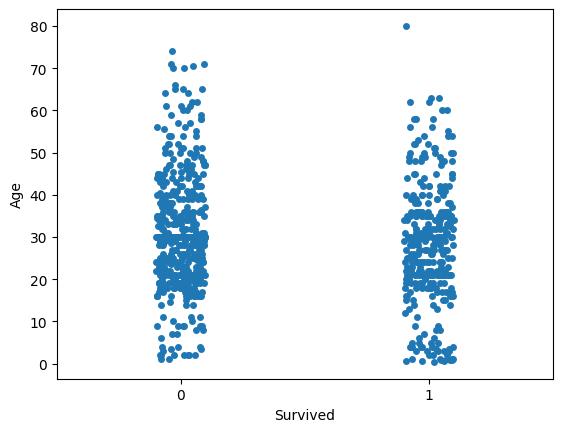

In [10]:
# survival by Age
sns.stripplot(x='Survived', y='Age', data=clean_df)

#### Adding bands to the `Age` column for graphing.

<Axes: xlabel='AgeBand', ylabel='Survived'>

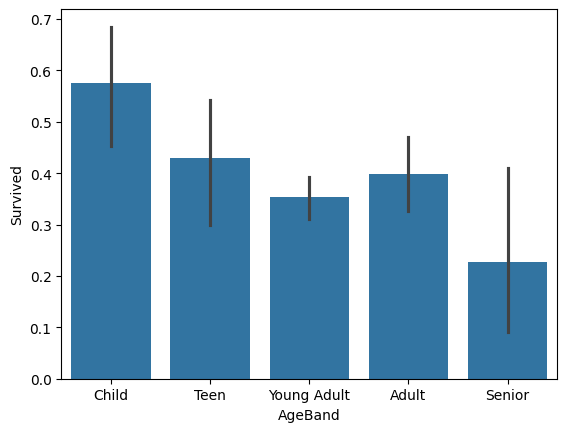

In [11]:
clean_df['AgeBand'] = pd.cut(clean_df['Age'], bins=[0, 12, 18, 35, 60, 80], labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])

# survival by Age Band
sns.barplot(x='AgeBand', y='Survived', data=clean_df)

In [12]:
# correlation map for Survived 
corr_df = clean_df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'HasCabinInfo']].copy()
corr = corr_df.corr()

corr.style.background_gradient(cmap='coolwarm')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,HasCabinInfo
Survived,1.000000,-0.338481,-0.543351,-0.078931,-0.035322,0.081629,0.257307,0.316912
Pclass,-0.338481,1.000000,0.131900,-0.354189,0.083081,0.018443,-0.549500,-0.725541
Sex,-0.543351,0.131900,1.000000,0.104921,-0.114631,-0.245489,-0.182333,-0.140391
Age,-0.078931,-0.354189,0.104921,1.000000,-0.265621,-0.188159,0.097947,0.243606
SibSp,-0.035322,0.083081,-0.114631,-0.265621,1.000000,0.414838,0.159651,-0.040460
Parch,0.081629,0.018443,-0.245489,-0.188159,0.414838,1.000000,0.216225,0.036987
Fare,0.257307,-0.549500,-0.182333,0.097947,0.159651,0.216225,1.000000,0.482075
HasCabinInfo,0.316912,-0.725541,-0.140391,0.243606,-0.040460,0.036987,0.482075,1.000000
